### 1. 创建数据集

#### 1.1 周志华-机器学习-西瓜数据集2.0

In [1]:
data_text = """
编号,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,否
10,青绿,硬挺,清脆,清晰,平坦,软粘,否
11,浅白,硬挺,清脆,模糊,平坦,硬滑,否
12,浅白,蜷缩,浊响,模糊,平坦,软粘,否
13,青绿,稍蜷,浊响,稍糊,凹陷,硬滑,否
14,浅白,稍蜷,沉闷,稍糊,凹陷,硬滑,否
15,乌黑,稍蜷,浊响,清晰,稍凹,软粘,否
16,浅白,蜷缩,浊响,模糊,平坦,硬滑,否
17,青绿,蜷缩,沉闷,稍糊,稍凹,硬滑,否
"""

In [8]:
import pandas as pd

data_list = data_text.split("\n")
column_name_list = []
data_origin_X = []
data_origin_Y = []

for inx, line in enumerate(data_list):
    if inx == 0:
        continue
    if inx == 1:
        column_name_list = line.split(",")[1:-1]
        continue
    if inx == len(data_list)-1:
        continue
    data_origin_X.append(line.split(",")[1:-1])
    data_origin_Y.append(line.split(",")[-1])

print(data_origin_X)
print(data_origin_Y)

[['青绿', '蜷缩', '浊响', '清晰', '凹陷', '硬滑'], ['乌黑', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑'], ['乌黑', '蜷缩', '浊响', '清晰', '凹陷', '硬滑'], ['青绿', '蜷缩', '沉闷', '清晰', '凹陷', '硬滑'], ['浅白', '蜷缩', '浊响', '清晰', '凹陷', '硬滑'], ['青绿', '稍蜷', '浊响', '清晰', '稍凹', '软粘'], ['乌黑', '稍蜷', '浊响', '稍糊', '稍凹', '软粘'], ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '硬滑'], ['乌黑', '稍蜷', '沉闷', '稍糊', '稍凹', '硬滑'], ['青绿', '硬挺', '清脆', '清晰', '平坦', '软粘'], ['浅白', '硬挺', '清脆', '模糊', '平坦', '硬滑'], ['浅白', '蜷缩', '浊响', '模糊', '平坦', '软粘'], ['青绿', '稍蜷', '浊响', '稍糊', '凹陷', '硬滑'], ['浅白', '稍蜷', '沉闷', '稍糊', '凹陷', '硬滑'], ['乌黑', '稍蜷', '浊响', '清晰', '稍凹', '软粘'], ['浅白', '蜷缩', '浊响', '模糊', '平坦', '硬滑'], ['青绿', '蜷缩', '沉闷', '稍糊', '稍凹', '硬滑']]
['是', '是', '是', '是', '是', '是', '是', '是', '否', '否', '否', '否', '否', '否', '否', '否', '否']


### 2. 划分选择

#### 2.1 信息增益

**信息熵**

In [9]:
import numpy as np
from functools import reduce

def ent(probabilitys):
    """ 计算一组概率的信息熵
    
    arguments:
    ---------
    probabilitys: numpy or list
    
    returns:
    --------
    ent: 信息熵
    """
    return - reduce(lambda x,y:x+y*np.log2(y), probabilitys, 0.0)

**计算给定数据集的信息熵**

In [14]:
import numpy as np
from collections import Counter

def EntData(X, Y):
    """ 计算一个数据集中未划分前的信息熵
    
    arguments:
    ----------
    X: list or numpy, shape=(n_samples, n_features)
    Y: list or numpy, shape=(n_samples, )
    
    returns:
    --------
    ent: float, entropy
    """
    Y = np.array(Y)
    counter = Counter(Y)
    return ent([i / sum(counter.values()) for i in counter.values()])

In [13]:
EntData(data_origin_X, data_origin_Y)

0.9975025463691153

**信息增益**

In [29]:
import numpy as np

def Gain(X, Y, feature_inx):
    """ 计算信息增益
    
    根据给定的数据集，以及给定的特征下标，求解指定特征的信息增益。暂时规定特征均是离散值。
    
    arguments:
    ----------
    X: list or numpy, shape=(n_samples, n_features)
    Y: list or numpy, shape=(n_samples,)
    features_inx: int, the subscript of features
    
    returns:
    --------
    gain: float
    partition: dict
    """
    
    X = np.array(X)
    Y = np.array(Y)
    
    n_samples, n_features = X.shape
    
    # step1: 计算给定数据集的信息熵
    data_ent = EntData(X, Y)
    
    # step2: 根据给定的特征下标，划分数据集 
    set_feature_value = list(set(X[:, feature_inx]))
    Y_partition = {}
    for value in set_feature_value:
        Y_partition[value] = list(np.where(X[:, feature_inx] == value)[0])

    # step3: 根据公式，计算信息增益
    gain = EntData(X, Y) - sum([(len(v) * EntData(X[v], Y[v]))/ n_samples for k,v in Y_partition.items()])
    
    return gain, Y_partition

**计算每个属性的信息增益**

In [34]:
for inx, name in enumerate(column_name_list):
    print("="*70)
    print(name)
    print(Gain(data_origin_X, data_origin_Y, inx))

色泽
(0.10812516526536531, {'浅白': [4, 10, 11, 13, 15], '青绿': [0, 3, 5, 9, 12, 16], '乌黑': [1, 2, 6, 7, 8, 14]})
根蒂
(0.142674959566793, {'蜷缩': [0, 1, 2, 3, 4, 11, 15, 16], '稍蜷': [5, 6, 7, 8, 12, 13, 14], '硬挺': [9, 10]})
敲声
(0.14078143361499584, {'沉闷': [1, 3, 8, 13, 16], '浊响': [0, 2, 4, 5, 6, 7, 11, 12, 14, 15], '清脆': [9, 10]})
纹理
(0.3805918973682686, {'模糊': [10, 11, 15], '稍糊': [6, 8, 12, 13, 16], '清晰': [0, 1, 2, 3, 4, 5, 7, 9, 14]})
脐部
(0.28915878284167895, {'凹陷': [0, 1, 2, 3, 4, 12, 13], '稍凹': [5, 6, 7, 8, 14, 16], '平坦': [9, 10, 11, 15]})
触感
(0.006046489176565584, {'软粘': [5, 6, 9, 11, 14], '硬滑': [0, 1, 2, 3, 4, 7, 8, 10, 12, 13, 15, 16]})


#### 2.2 增益率

In [39]:
import numpy as np

def gain_ratio(X, Y, feature_inx):
    """ 计算增益率
    
    根据给定的数据集，以及给定的特征下标，求解指定特征的信息增益。暂时规定特征均是离散值。
    
    arguments:
    ----------
    X: list or numpy, shape=(n_samples, n_features)
    Y: list or numpy, shape=(n_samples,)
    features_inx: int, the subscript of features
    
    returns:
    --------
    gain_ratio: float
    partition: dict
    """
    
    # step1: 整理参数，计算给定的数据的大小
    X = np.array(X)
    Y = np.array(Y)
    
    n_samples, n_features = X.shape
    
    # step2: 根据给定的特征下标，划分数据集 
    set_feature_value = list(set(X[:, feature_inx]))
    Y_partition = {}
    for value in set_feature_value:
        Y_partition[value] = list(np.where(X[:, feature_inx] == value)[0])

    # step3: 根据公式，计算增益率
    gain = EntData(X, Y) - sum([(len(v) * EntData(X[v], Y[v]))/ n_samples for k,v in Y_partition.items()])
    iv = -sum((len(v) / n_samples) * np.log2(len(v) / n_samples) for k, v in Y_partition.items())
    gain_ratio = gain / iv
    
    return gain_ratio, Y_partition

**计算每个属性的增益率**

In [40]:
for inx, name in enumerate(column_name_list):
    print("="*70)
    print(name)
    print(gain_ratio(data_origin_X, data_origin_Y, inx))

色泽
(0.06843956584615815, {'浅白': [4, 10, 11, 13, 15], '青绿': [0, 3, 5, 9, 12, 16], '乌黑': [1, 2, 6, 7, 8, 14]})
根蒂
(0.10175939805373699, {'蜷缩': [0, 1, 2, 3, 4, 11, 15, 16], '稍蜷': [5, 6, 7, 8, 12, 13, 14], '硬挺': [9, 10]})
敲声
(0.10562670944314426, {'沉闷': [1, 3, 8, 13, 16], '浊响': [0, 2, 4, 5, 6, 7, 11, 12, 14, 15], '清脆': [9, 10]})
纹理
(0.2630853587192754, {'模糊': [10, 11, 15], '稍糊': [6, 8, 12, 13, 16], '清晰': [0, 1, 2, 3, 4, 5, 7, 9, 14]})
脐部
(0.18672689918448793, {'凹陷': [0, 1, 2, 3, 4, 12, 13], '稍凹': [5, 6, 7, 8, 14, 16], '平坦': [9, 10, 11, 15]})
触感
(0.0069183298534003, {'软粘': [5, 6, 9, 11, 14], '硬滑': [0, 1, 2, 3, 4, 7, 8, 10, 12, 13, 15, 16]})


#### 2.3 计算基尼指数

**基尼指数**

In [45]:
import numpy as np
from functools import reduce

def gini(probabilitys):
    """ 计算一组概率的基尼指数
    
    arguments:
    ----------
    probabilitys: numpy or list
    
    returns:
    --------
    gini: float 基尼指数
    """
    return 1 - reduce(lambda x,y:x+y*y, probabilitys, 0.0)

In [18]:
gini([1/3, 1/3, 1/3])

0.6666666666666667

**计算给定数据集的基尼指数**

In [44]:
import numpy as np
from collections import Counter

def gini_data(X, Y):
    """ 计算给定数据集的基尼指数
    
    arguments:
    ----------
    X: list or numpy, shape=(n_samples, n_features)
    Y: list or numpy, shape=(n_samples)
    
    returns:
    --------
    gini: float gini_index
    """
    
    # step1: 整理数据并获取数据的大小
    X = np.array(X)
    Y = np.array(Y)
    n_samples, n_features = X.shape
    
    # step2: 计算基尼指数
    counter = Counter(Y)
    return gini([i / sum(counter.values()) for i in counter.values()])

**计算给定属性的基尼指数**

In [46]:
import numpy as np

def gini_index(X, Y, feature_inx):
    """ 计算基尼指数
    
    根据给定的数据集，以及给定的特征下标，求解指定特征的基尼指数。暂时规定特征均是离散值。
    
    arguments:
    ----------
    X: list or numpy, shape=(n_samples, n_features)
    Y: list or numpy, shape=(n_samples,)
    features_inx: int, the subscript of features
    
    returns:
    --------
    gini: float
    partition: dict
    """
    
    # step1: 整理参数，计算给定的数据的大小
    X = np.array(X)
    Y = np.array(Y)
    
    n_samples, n_features = X.shape
    
    # step2: 根据给定的特征下标，划分数据集 
    set_feature_value = list(set(X[:, feature_inx]))
    Y_partition = {}
    for value in set_feature_value:
        Y_partition[value] = list(np.where(X[:, feature_inx] == value)[0])

    # step3: 根据公式，计算基尼指数
    gini_index = sum([ (len(v) * gini_data(X[v], Y[v])) / n_samples for k, v in Y_partition.items()])
    
    return gini_index, Y_partition

**计算每个属性的基尼指数**

In [47]:
for inx, name in enumerate(column_name_list):
    print("="*70)
    print(name)
    print(gini_index(data_origin_X, data_origin_Y, inx))

色泽
(0.42745098039215684, {'浅白': [4, 10, 11, 13, 15], '青绿': [0, 3, 5, 9, 12, 16], '乌黑': [1, 2, 6, 7, 8, 14]})
根蒂
(0.42226890756302526, {'蜷缩': [0, 1, 2, 3, 4, 11, 15, 16], '稍蜷': [5, 6, 7, 8, 12, 13, 14], '硬挺': [9, 10]})
敲声
(0.4235294117647059, {'沉闷': [1, 3, 8, 13, 16], '浊响': [0, 2, 4, 5, 6, 7, 11, 12, 14, 15], '清脆': [9, 10]})
纹理
(0.2771241830065359, {'模糊': [10, 11, 15], '稍糊': [6, 8, 12, 13, 16], '清晰': [0, 1, 2, 3, 4, 5, 7, 9, 14]})
脐部
(0.3445378151260504, {'凹陷': [0, 1, 2, 3, 4, 12, 13], '稍凹': [5, 6, 7, 8, 14, 16], '平坦': [9, 10, 11, 15]})
触感
(0.49411764705882355, {'软粘': [5, 6, 9, 11, 14], '硬滑': [0, 1, 2, 3, 4, 7, 8, 10, 12, 13, 15, 16]})


### 3. 生成完整决策树

#### 3.1 构建树结构

In [51]:
class TreeNode(object):
    """ Generic tree node.
    """
    
    def __init__(self, feature_name, condition, is_result=False, children=None):
        """ 初始化决策树
        
        arguments:
        ----------
        feature_name: String, feature name
        condition: tuple, (condition, value), partition condition
        """
        self.feature_name = feature_name
        self.condition = condition
        self.is_result = is_result
        self.children = []
        
        if children is not None:
            for child in children:
                self.add_child(child)
    
    def add_child(self, node):
        """ 添加分支结点
        """
        assert isinstance(node, TreeNode)
        self.children.append(node)

In [52]:
# 根节点
root_node = TreeNode("脐部", None)

# 第一层几点
aoxian_node = TreeNode("色泽", ("=", "凹陷"))
shaoao_node = TreeNode("根蒂", ("=", "稍凹"))
pingtan_node = TreeNode("坏瓜", ("=", "平坦"), is_result=True)
    
root_node.add_child(aoxian_node)
root_node.add_child(shaoao_node)
root_node.add_child(pingtan_node)

#### 3.2 根据树结构，绘制决策树图

In [5]:
import matplotlib.pyplot as plt

#定义文本框和箭头格式
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    """
    Function：   绘制带箭头的注解

    Args：       nodeTxt：文本注解
                centerPt：箭头终点坐标
                parentPt：箭头起始坐标
                nodeType：文本框类型

    Returns：    无
    """
    #在全局变量createPlot0.ax1中绘图
    createPlot0.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',
             xytext=centerPt, textcoords='axes fraction',
             va="center", ha="center", bbox=nodeType, arrowprops=arrow_args )

def createPlot0():
    """
    Function：   使用文本注解绘制树节点

    Args：       无

    Returns：    无
    """
    #创建一个新图形
    fig = plt.figure(1, facecolor='white')
    #清空绘图区
    fig.clf()
    #给全局变量createPlot0.ax1赋值
    createPlot0.ax1 = plt.subplot(111, frameon=False) #ticks for demo puropses 
    #绘制第一个文本注解
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    #绘制第二个文本注解
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    #显示最终绘制结果
    plt.show()

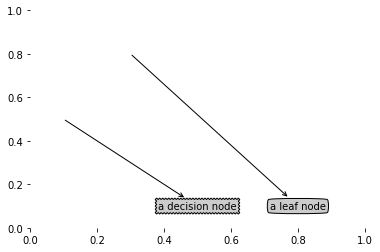

In [4]:
createPlot0()

#### 3.3 生成完整决策树

#### 3.4 绘制生成的完整决策树

### 4. 剪枝处理

#### 4.1 预剪枝

#### 4.2 后剪枝